In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import keras
%matplotlib inline
# from keras.models import Sequential
# from keras.layers import Dense
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

le = preprocessing.LabelEncoder()

/home/nad/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df=pd.read_csv("salaries_small.csv")

In [3]:
df

,name,job,experience,salary
0,skander,developer,5,1500
1,marouane,data-science,12,1800
2,alaa,business,45,3500
3,issam,data-science,25,2000
4,iyadh,web,33,2500
5,belja,business,1,1200
6,ahmed,developer,0,400
7,ali,data-science,30,2500
8,mouna,web,10,1000
9,skander,business,20,2200


In [4]:
df = pd.get_dummies(df, columns=['job'])

In [5]:
df

,name,experience,salary,job_business,job_data-science,job_developer,job_web
0,skander,5,1500,0,0,1,0
1,marouane,12,1800,0,1,0,0
2,alaa,45,3500,1,0,0,0
3,issam,25,2000,0,1,0,0
4,iyadh,33,2500,0,0,0,1
5,belja,1,1200,1,0,0,0
6,ahmed,0,400,0,0,1,0
7,ali,30,2500,0,1,0,0
8,mouna,10,1000,0,0,0,1
9,skander,20,2200,1,0,0,0


In [6]:
x = df[list(filter(lambda x: x not in ['salary','name'], df.columns))] # predictor
y = df.salary # response
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000)
# Train the model on training data
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [8]:
rf.predict([[20, 1,0,0,0]])

array([2282.2])

In [9]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

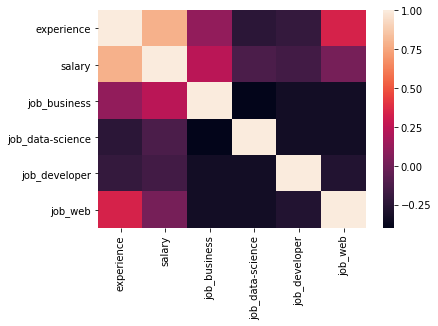

In [10]:
corr = df.corr()
sns.heatmap(corr)


In [11]:
similar("developer", "developpeur")

0.9

In [12]:
def predict_salary(position, experience=0, time_unit="years"):
    """
    Predict expected salary for the given expertise field and years of experience
    params: 
        -experience: int
        -time_unit: enum from: years, months, weeks
    """
    exp = experience
    if time_unit=="years":
        exp*=12
    X= [exp]
    for job in list(filter(lambda x: x not in ['salary','name', 'experience'], df.columns)):
        if similar("job_"+position, job)>=0.9:
            X.append(1)
        else:
            X.append(0)
    return rf.predict([X])[0]
            

In [13]:
# Prediction method:

predict_salary("web", 2) # By default experience is in YEARS 

list(filter(lambda x: x not in ['salary','name'], df.columns))

['experience', 'job_business', 'job_data-science', 'job_developer', 'job_web']

### Algorithm Accuracy

In [14]:
print("Algorithm accuracy:", str(rf.score(x_test, y_test)*100)+"%")

Algorithm accuracy: 95.52174654907975%


# Prediction method:

In [15]:
## call function using "job" and "experience" parameters

In [16]:
predict_salary("webs", 10) # By default experience is in YEARS 

4247.1

In [17]:
predict_salary("business", 20, "months") 

2282.2